# Regularization

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

### Polynomial regression

Given the following function of the "ground truth", and a few sample data points we will use for regression. The example is by Mathieu Blondel & Jake Vanderplas ([source](http://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html)).

In [4]:
func = lambda x: x * np.sin(x)
# same as a function - function literal - instead of def function.

In [ ]:
np.linspace(0,10,1000)

In [6]:
N, n = 1000, 10
# two sets of numbers
domain = np.linspace(0, 10, N)
x_sample = np.sort(np.random.choice(domain, n))
# sort numpy array and generate random numbers
y_sample = func(x_sample)

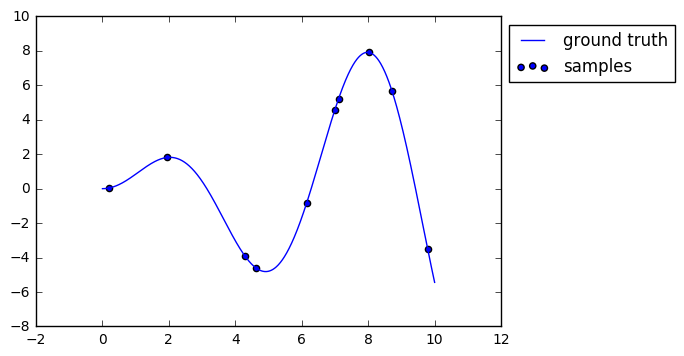

In [7]:
f = plt.plot(domain, func(domain), label="ground truth")
f = plt.scatter(x_sample, func(x_sample), label="samples")
f = plt.legend(loc="upper left", bbox_to_anchor=(1,1))

Obviously linear regression won't bring you far:

R2 = 0.0897878721635


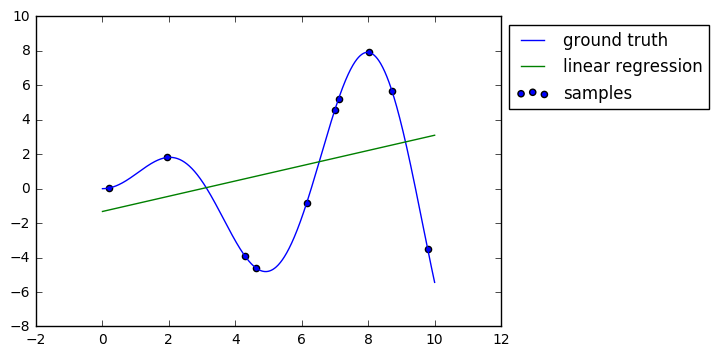

In [8]:
X = np.array([x_sample]).T
# T transpose
model = LinearRegression().fit(X, y_sample)
# y_sample above
print "R2 =", model.score(X, y_sample)
f = plt.plot(domain, func(domain), label="ground truth")
f = plt.scatter(x_sample, func(x_sample), label="samples")
f = plt.plot([0, 10], [model.intercept_, model.intercept_ + 10 * model.coef_[0]], label="linear regression")
f = plt.legend(loc="upper left", bbox_to_anchor=(1,1))

Now try a few polynomial regressions to fit the given sample data points.

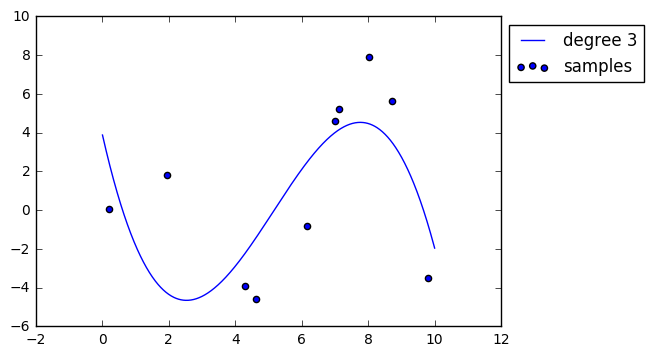

In [10]:
X = np.array([x_sample]).T
# f = plt.plot(x, func(x), label="ground truth", alpha=.4)
f = plt.scatter(x_sample, func(x_sample), label="samples")

degree = 3
# transpose to 4th degree polynomial 
model = make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X, y_sample)
y_pred = model.predict(np.array([domain]).T)
plt.plot(domain, y_pred, label="degree %d" % degree)

f = plt.legend(loc="upper left", bbox_to_anchor=(1,1))

- It's actually a result from algebra that you can fit *any* finite set of data points with a polynomial. 
- In fact, for any set of $n$ data points, there exists a polynomial of degree $n$ that goes right through them.
- This is great if you'd want to approximate your data arbitrarily closely.
- It's not great if you're afraid of overfitting your data

### Overfitting

Suppose you want to find a model behind some data, which also contains some arbitrary noise.

In [15]:
func = lambda x: 1 + .1 * (x - 4) ** 2 + 4 * np.random.random(len(x))
# set literal function, numpy array litteral transformation - from 0 to whatever length of x 

In [16]:
N, n = 1000, 30
domain = np.linspace(0, 15, N)
# continuous data 0-15
x_sample = np.linspace(0, 15, n)
# n = 30 from above generate 30 data points
y_sample = func(x_sample)
# 30 numbers generated 0 to 15

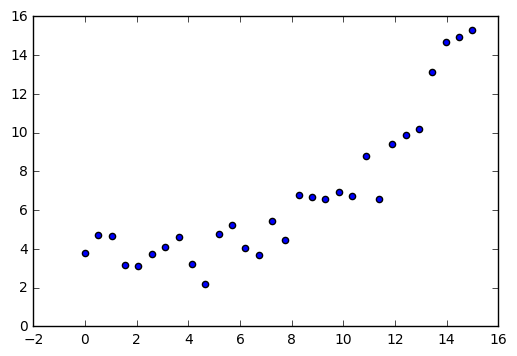

In [17]:
f = plt.scatter(x_sample, func(x_sample))

Obviously you could fit this noise by an arbitrarily complex model.

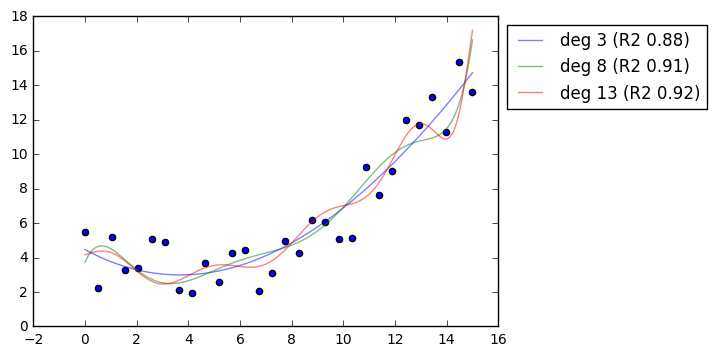

In [19]:
X = np.array([x_sample]).T
# sikit learn think numpy aray
f = plt.scatter(x_sample, func(x_sample))
# test for different degrees 
for degree in [3, 8, 13]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X, y_sample)
    y_pred = model.predict(np.array([domain]).T)
    plt.plot(domain, y_pred, alpha=.5, label="deg %d (R2 %.2f)" % (degree, model.score(X, y_sample)))

f = plt.legend(loc="upper left", bbox_to_anchor=(1,1))

It makes sense that that is obviously not what you want.

For degree 1 , R2 = 0.630580570506
For degree 2 , R2 = 0.767250009315
For degree 3 , R2 = 0.677530412828
For degree 4 , R2 = 0.768830165865
For degree 5 , R2 = 0.636390152423


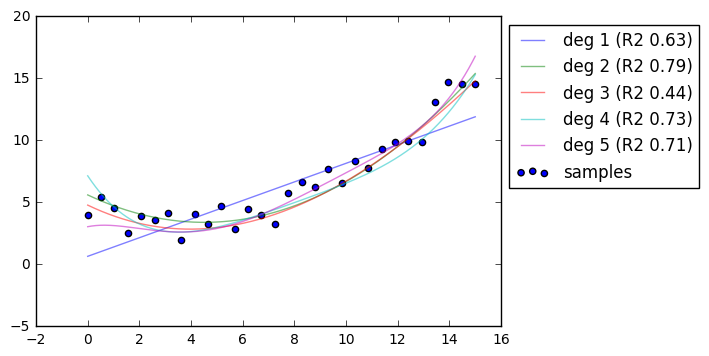

In [20]:
f = plt.scatter(x_sample, func(x_sample), label="samples")

for degree in [1, 2, 3, 4, 5]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    # Compute a few R2 scores and print average performance
    scores = []
    for k in xrange(15):
#         splitting the data 15 times and getting r squared each time
        X_train, X_test, y_train, y_test = train_test_split(X, y_sample, train_size=.7)
        scores.append(model.fit(X_train, y_train).score(X_test, y_test))
        
    print "For degree", degree, ", R2 =", np.mean(scores)
    # Take last model to plot predictions
    y_pred = model.predict(np.array([domain]).T)
#     plot for every degree model - plot from 15 
    plt.plot(domain, y_pred, alpha=.5, label="deg %d (R2 %.2f)" % (degree, model.score(X_test, y_test)))

    f = plt.legend(loc="upper left", bbox_to_anchor=(1,1))

It seems that a second or third degree polynomial performs better than a fifth one on unseen data, which makes sense, since that's how we generated the samples.

Let's compare the different models once more:

In [21]:
def analyze_performance(test_model):
    scores = {'overfit': {}, 'cv': {}}
    for degree in xrange(0, 30):
        model = make_pipeline(PolynomialFeatures(degree), test_model) 
#         pipeline for transforming the data
        scores['overfit'][degree] = model.fit(X, y_sample).score(X, y_sample)
#     takes care of transformations so you don't transform each df - fit and score same - \n
# predicting on data model was built on r squared best fit
        cv_scores = []
        for k in xrange(15):  # Compute a few R2 scores and print average performance
#             split data 15 times 
            X_train, X_test, y_train, y_test = train_test_split(X, y_sample, train_size=.7)
            cv_scores.append(model.fit(X_train, y_train).score(X_test, y_test))
#         r squared predictive power appended to cv_scores
        scores['cv'][degree] = np.mean(cv_scores)
#     mean score of 15 splits appended to cv dictionary
    return pd.DataFrame(scores)

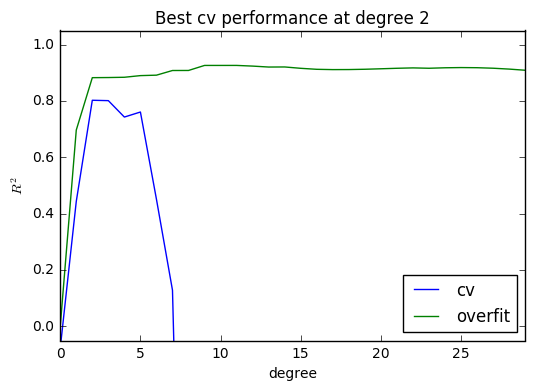

In [22]:
scores = analyze_performance(LinearRegression())
f = scores.plot(ylim=(-.05,1.05))
f = plt.title("Best cv performance at degree %d" % scores.cv.argmax()), plt.xlabel('degree'), plt.ylabel('$R^2$')

In [23]:
scores

,cv,overfit
0,-7.708924e-02,0.000000
1,4.435082e-01,0.696765
2,8.024658e-01,0.882632
3,8.011079e-01,0.883084
4,7.428806e-01,0.884055
5,7.607492e-01,0.889915
6,4.512455e-01,0.891512
7,1.285108e-01,0.908043
8,-2.086801e+00,0.908199
9,-7.576946e+01,0.926050


### Regularization

If your model is very complex (i.e., lots of features, possibly a polynomial fit, etc.), you need to worry more about overfitting.
- You'll need regularization when your model is complex, which happens when you have little data or many features.
- The example below uses the same dataset as above, but with fewer samples, and a relatively high degree model.
- We'll fit the (unregularized) `LinearRegression`, as well as the (regularized) `Ridge` and `Lasso` model.
  - Lasso regression imposes an L1 prior on the coefficient, causing many coeffiecients to be zero.
  - Ridge regression imposes an L2 prior on the coefficient, causing outliers to be less likely, and coeffiecients to be small across the board.

C:\Users\Amber\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


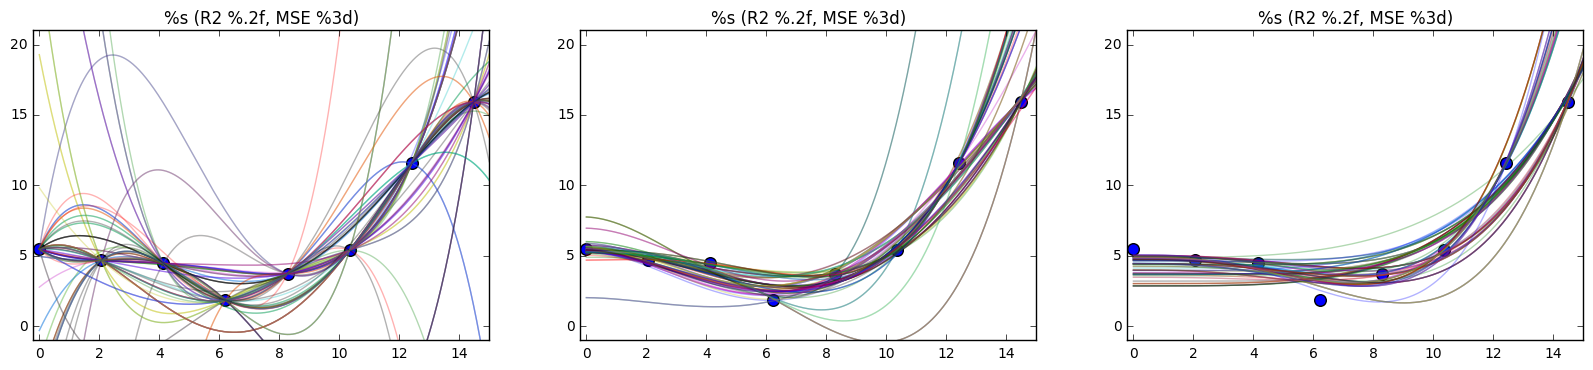

In [26]:
x_small_sample = x_sample[::4]
y_small_sample = func(x_small_sample)

degree, alpha = 4, 10

X = np.array([x_small_sample]).T
fig, axes = plt.subplots(1, 3, figsize=(20, 4))
for no, my_model in enumerate([LinearRegression(), Ridge(alpha=alpha), Lasso(alpha=alpha)]):    
    model = make_pipeline(PolynomialFeatures(degree), my_model)    
    r2, MSE = [], []
    for k in xrange(100):  # Fit a few times the model to different training sets
        X_train, X_test, y_train, y_test = train_test_split(
            X, y_small_sample, train_size=.7)
        r2.append(model.fit(X_train, y_train).score(X_test, y_test))
        y_pred = model.predict(np.array([domain]).T)
        axes[no].plot(domain, y_pred, alpha=.3)
        y_pred_sample = model.predict(np.array([x_small_sample]).T)
        MSE.append(np.square(y_pred_sample - y_small_sample).sum())
    axes[no].scatter(x_small_sample, y_small_sample, s=70)
    axes[no].set_title("%s (R2 %.2f, MSE %3d)" )
    axes[no].set_xlim(-.2, max(domain)), axes[no].set_ylim(-1, 21)

- Indeed, the unregularized `LinearRegression` leads to a model that is too complex and tries to fit the noise. 
- Note the differences in the (averaged) mean square error, or MSE, as well the complexity in the plots
- Note that the $R^2$ metric is not helpful here.

SyntaxError: 'return' outside function (<ipython-input-32-719665f8891b>, line 20)

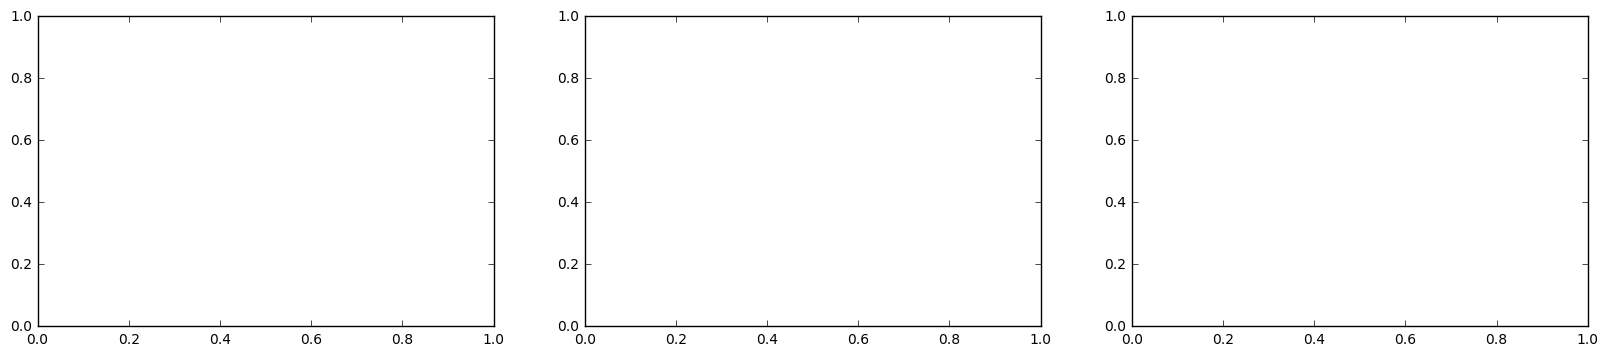

In [32]:
x_small_sample = x_sample[::4]
y_small_sample = func(x_small_sample)

degree, alpha = 4, 10

X = np.array([x_small_sample]).T
fig, axes = plt.subplots(1, 3, figsize=(20, 4))
for no, my_model in enumerate([LinearRegression(), Ridge(alpha=alpha), Lasso(alpha=alpha)]):    
    model = make_pipeline(PolynomialFeatures(degree), my_model)    
    r2, MSE = [], []
    for k in xrange(100):  # Fit a few times the model to different training sets
        X_train, X_test, y_train, y_test = train_test_split(
            X, y_small_sample, train_size=.7)
        r2.append(model.fit(X_train, y_train).score(X_test, y_test))
        y_pred = model.predict(np.array([domain]).T)
        axes[no].plot(domain, y_pred, alpha=.3)
        y_pred_sample = model.predict(np.array([x_small_sample]).T)
        mse_1 = np.square(y_pred_sample - y_small_sample).sum()
        MSE.append(mse_1)
        return mse_1
    print "MSE for all splits for model number {}".format(no)
#     print np.mean(MSE)

#### Increasing complexity

Let's try a few degrees with a regularized model.

In [29]:
test_models = [LinearRegression(), Ridge(alpha=10), Lasso(alpha=10)]

scores = [analyze_performance(my_model) for my_model in test_models]

ValueError: Found arrays with inconsistent numbers of samples: [ 8 30]

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4))
for no, score in enumerate(scores):
    s, name = pd.DataFrame(score), test_models[no].__class__.__name__
    f = s.plot(ylim=(-.05,1.05), ax=axes[no], legend=False)
    f = axes[no].set_title("%s\nBest cv performance at degree %d" % (name, s.cv.argmax()))
    f = axes[no].set_xlabel('degree'), axes[no].set_ylabel('$R^2$')

We could try a few different values for $\alpha$ as well.

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(18, 6))
for col, alpha in enumerate([0, 1, 10, 100]):
    scores = [analyze_performance(my_model) for my_model in [Ridge(alpha=alpha), Lasso(alpha=alpha)]]
    for row, score in enumerate(scores):
        s, name = pd.DataFrame(score), test_models[row].__class__.__name__
        f = s.plot(ylim=(-.05,1.05), ax=axes[row, col], legend=False)
        f = axes[row, col].set_title("%s (alpha %d)\nBest cv at degree %d" % (name, alpha, s.cv.argmax()))
        f = axes[row, col].set_xlabel('degree'), axes[row, col].set_ylabel('$R^2$')
f = plt.tight_layout()

We see that that Ridge and Lasso keep performing well for higher degrees, because of their regularization.



<hr>

## Exercises

(Not verified yet.)

Take a dataset from the previous Linear Regression notebook (eg Princeton salaries or Boston house prices) and try to repeat the exercises using regularization.


```Python
from sklearn import linear_model

model = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])
model.fit(X,y)

print model.coef_
print model.alpha_
```

### Additional Resources
- [Linear Regression with Python](http://connor-johnson.com/2014/02/18/linear-regression-with-python/)
- [Statsmodels Documentation](http://statsmodels.sourceforge.net/stable/index.html)
- [Python 538 Model](https://github.com/jseabold/538model)
